# **Linear Regression**

Berdasarkan dataset yang didapat akan dibuat model untuk price prediction

--------

## Import Pustaka

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder

In [4]:
data = pd.read_csv('rideshare_kaggle.csv')
df = data.copy()
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Data uploading dari csv lalu disimpan ke variabel df yang merupakan copy dari variabel data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Info dari df untuk melihat tipe data dari setiap kolom dan juga jumlah data non null

------

## EDA

In [6]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Tahap diatas untuk melihat apakah ada data null pada setiap kolom

In [7]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Melihat 5 data awal pada dataframe

Text(0.5, 1.0, 'distance')

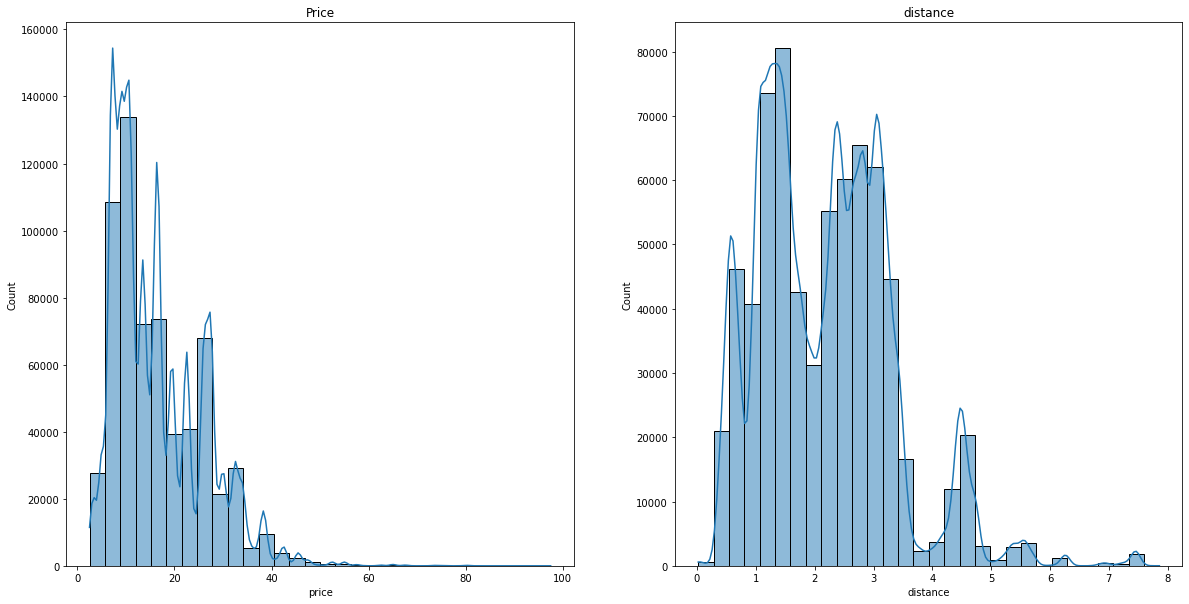

In [8]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price')

fig.add_subplot(row, col, 2)
sns.histplot(df['distance'], bins=30, kde=True)
plt.title('distance')

Tahap diatas untuk melihat gambaran awal sebaran data di kolom price dan distance

In [9]:
df.groupby('cab_type').mean()['price'].sort_values(ascending=False)

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

Rata-rata price untuk setiap cab_type

<AxesSubplot:>

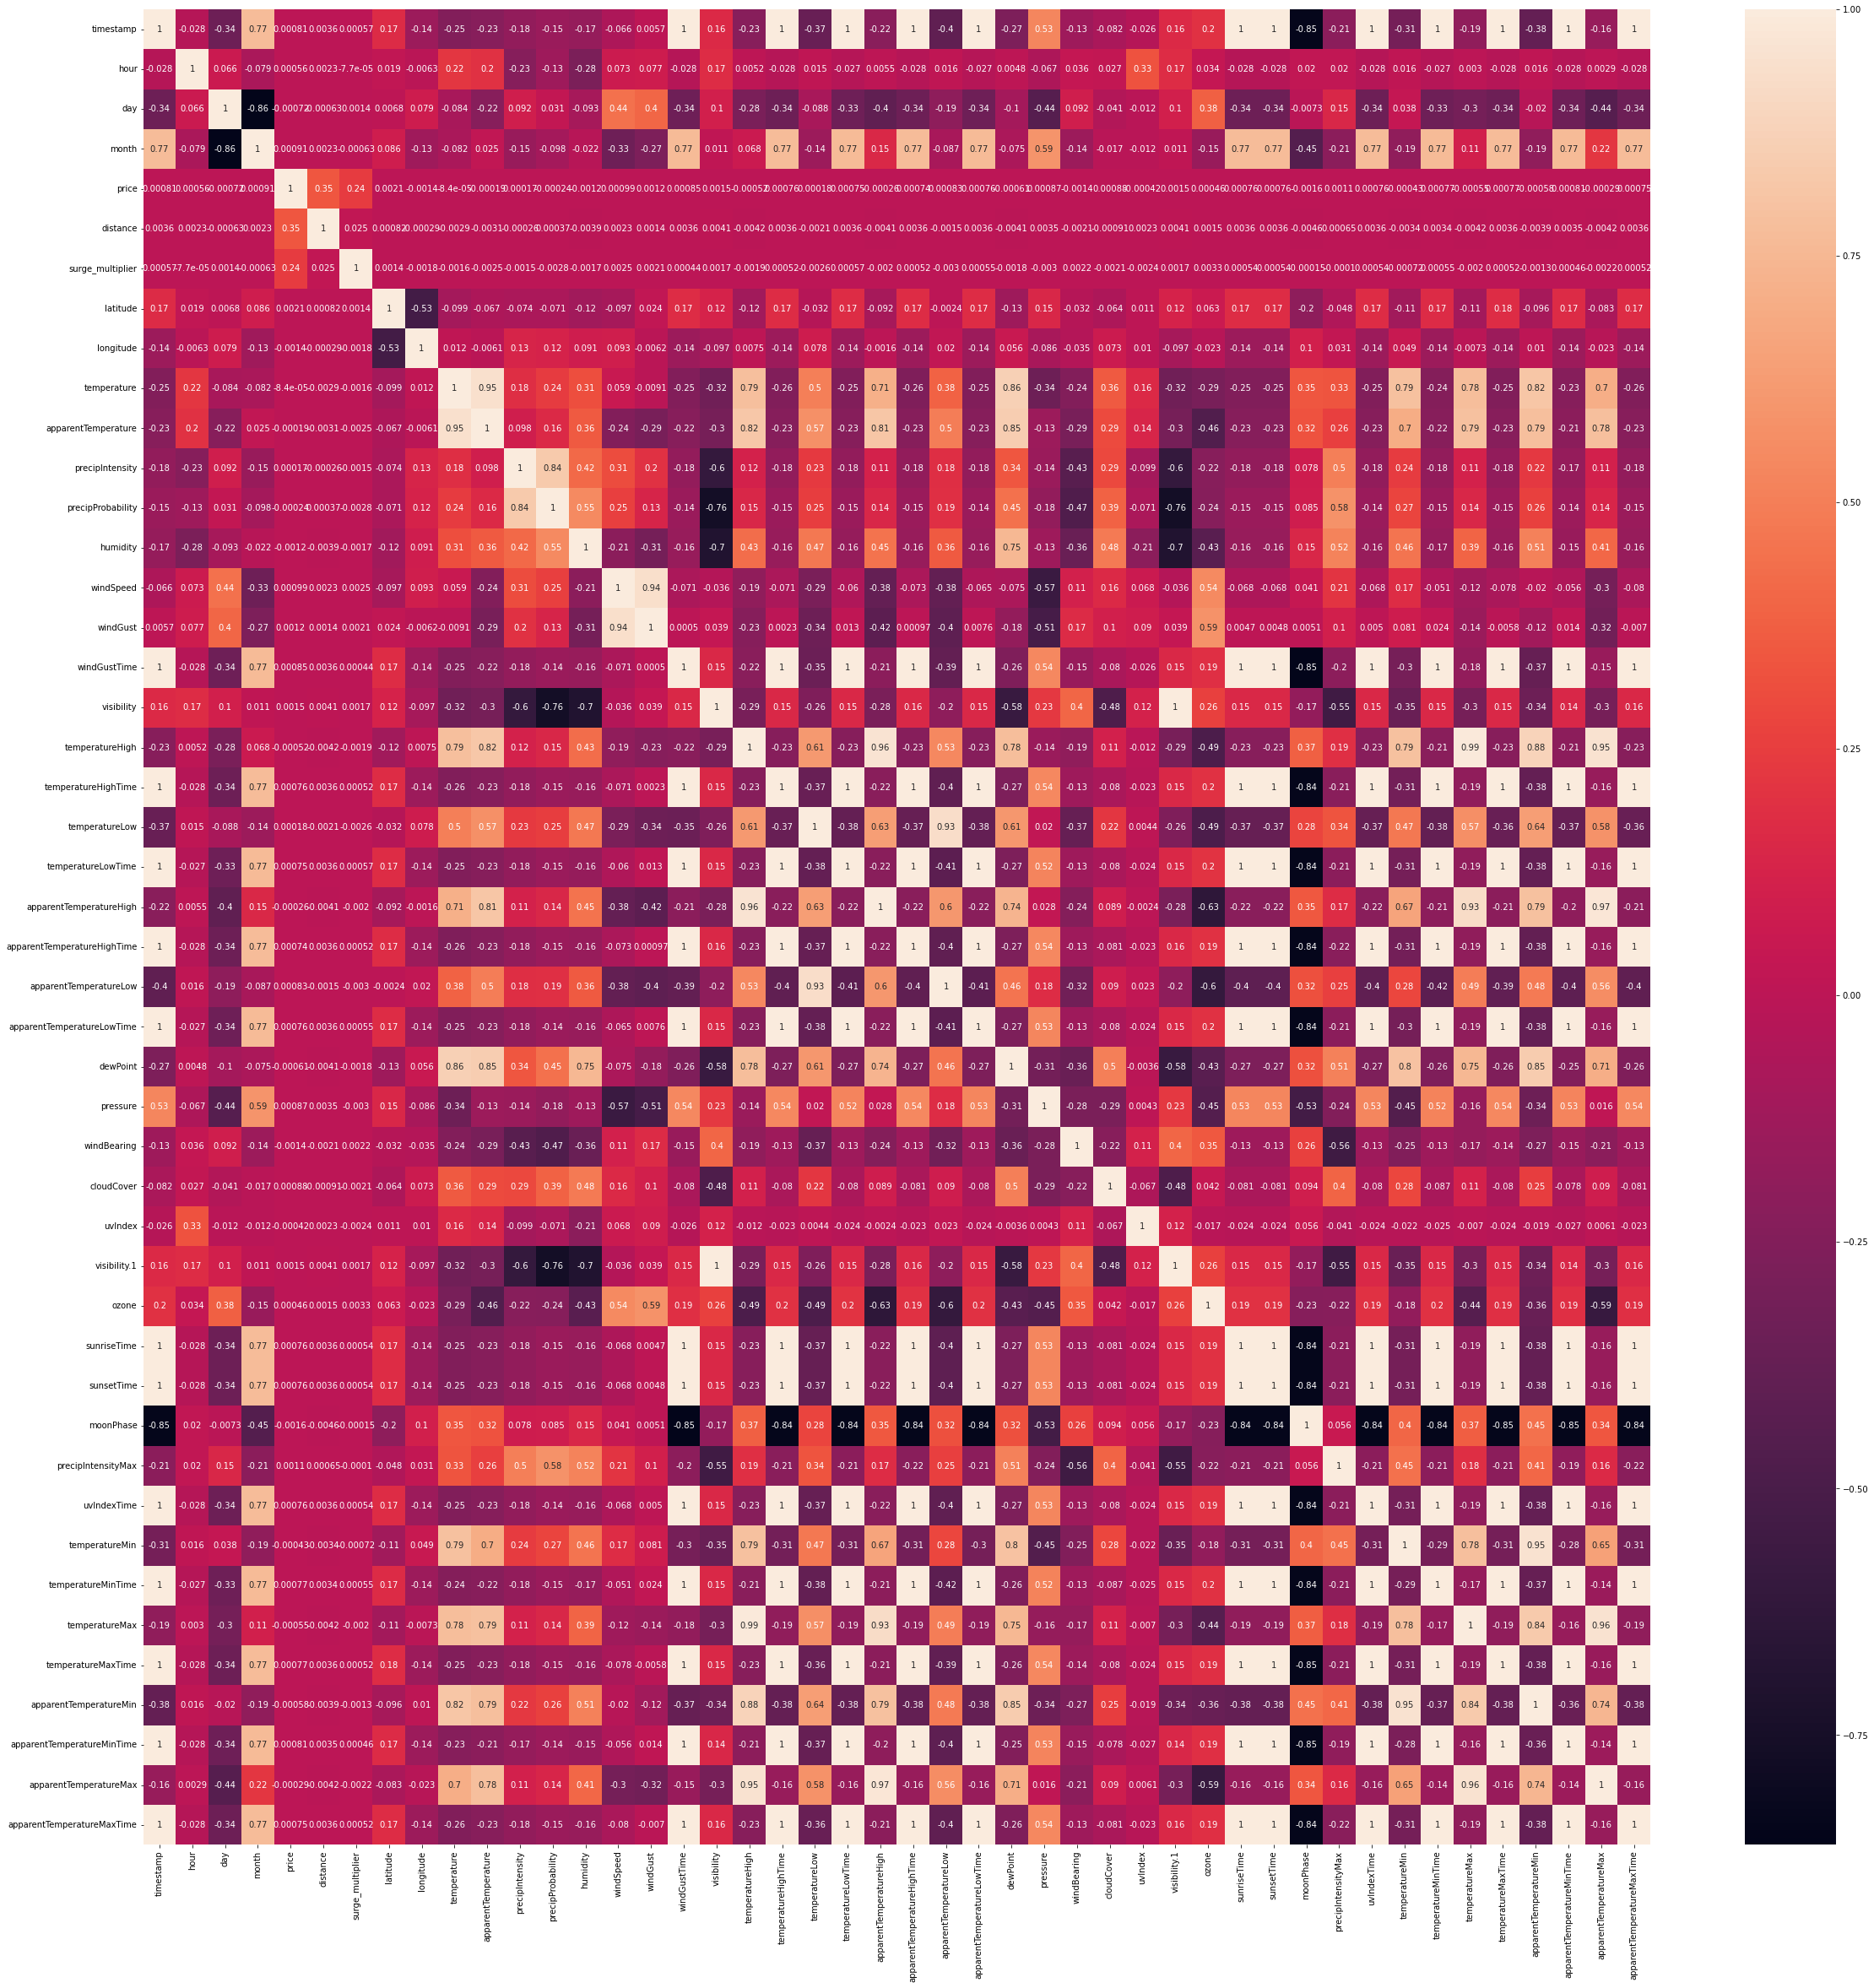

In [10]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)

Berdasarkan heatmap bisa dilihat korelasi antar kolom data dimana nilai 1 artinya paling berkorelasi positif dan -1 paling berkorelasi negatif.

In [11]:
df.corr().sort_values('price',ascending=False, key=abs).index

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'moonPhase',
       'visibility.1', 'visibility', 'longitude', 'windBearing', 'humidity',
       'windGust', 'precipIntensityMax', 'windSpeed', 'month', 'cloudCover',
       'pressure', 'windGustTime', 'apparentTemperatureLow',
       'apparentTemperatureMinTime', 'timestamp', 'temperatureMinTime',
       'temperatureMaxTime', 'uvIndexTime', 'apparentTemperatureLowTime',
       'sunsetTime', 'sunriseTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureMaxTime',
       'apparentTemperatureHighTime', 'day', 'dewPoint',
       'apparentTemperatureMin', 'hour', 'temperatureMax', 'temperatureHigh',
       'ozone', 'temperatureMin', 'uvIndex', 'apparentTemperatureMax',
       'apparentTemperatureHigh', 'precipProbability', 'apparentTemperature',
       'temperatureLow', 'precipIntensity', 'temperature'],
      dtype='object')

Untuk nantinya dalam model price prediction, akan diambil beberapa kolom yang paling berkorelasi dengan data price.

---

## Data Preprocessing

In [12]:
kolom = ['price', 'distance', 'surge_multiplier', 'moonPhase', 'visibility', 'name', 'cab_type']
df_cek = df[kolom]
df_cek.head()

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,5.0,0.44,1.0,0.30,10.000,Shared,Lyft
1,11.0,0.44,1.0,0.64,4.786,Lux,Lyft
2,7.0,0.44,1.0,0.68,10.000,Lyft,Lyft
3,26.0,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,9.0,0.44,1.0,0.72,10.000,Lyft XL,Lyft


Filtering data yang akan diolah, untuk efisiensi proses. Pemilihan kolom berdasar pada nilai korelasi pada step sebelumnya

In [13]:
df_cek.isnull().sum()

price               55095
distance                0
surge_multiplier        0
moonPhase               0
visibility              0
name                    0
cab_type                0
dtype: int64

Memeriksa kembali apakah ada nilai null

In [14]:
df_cek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          693071 non-null  float64
 2   surge_multiplier  693071 non-null  float64
 3   moonPhase         693071 non-null  float64
 4   visibility        693071 non-null  float64
 5   name              693071 non-null  object 
 6   cab_type          693071 non-null  object 
dtypes: float64(5), object(2)
memory usage: 37.0+ MB


Melihat tipe data pada setiap kolom untuk memastikan sesuai dengan isiannya.

---

## Inference

In [15]:
# get data for model inference
df_inf = df_cek.sample(10, random_state=22)
df_inf

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
420034,NaN,1.47,1.00,0.68,2.642,Taxi,Uber
271,16.5,1.08,1.25,0.68,9.961,Lux,Lyft
89721,9.0,0.53,1.00,0.93,9.878,Lyft XL,Lyft
81235,27.0,1.41,1.00,0.21,9.725,Black SUV,Uber
493887,7.0,1.53,1.00,0.24,9.608,Lyft,Lyft
337186,9.5,2.72,1.00,0.24,7.769,UberX,Uber
180753,34.0,1.25,1.25,0.64,3.058,Lux Black XL,Lyft
174499,9.0,2.93,1.00,0.21,10.000,Shared,Lyft
610470,16.0,1.08,1.00,0.68,10.000,Black,Uber
220905,13.0,1.35,1.00,0.72,10.000,UberXL,Uber


Mengambil 10 data random yang nantinya akan dipakai untuk model inference.

In [16]:
df_train_test = df_cek.drop(df_inf.index)
df_train_test

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,5.0,0.44,1.0,0.30,10.000,Shared,Lyft
1,11.0,0.44,1.0,0.64,4.786,Lux,Lyft
2,7.0,0.44,1.0,0.68,10.000,Lyft,Lyft
3,26.0,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,9.0,0.44,1.0,0.72,10.000,Lyft XL,Lyft
...,...,...,...,...,...,...,...
693066,13.0,1.00,1.0,0.82,9.785,UberXL,Uber
693067,9.5,1.00,1.0,0.82,9.785,UberX,Uber
693068,NaN,1.00,1.0,0.82,9.785,Taxi,Uber
693069,27.0,1.00,1.0,0.82,9.785,Black SUV,Uber


Data yang telah dipisahkan dari 10 data sebelumnya disimpan ke dalam variable df_train_test

In [17]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,NaN,1.47,1.00,0.68,2.642,Taxi,Uber
1,16.5,1.08,1.25,0.68,9.961,Lux,Lyft
2,9.0,0.53,1.00,0.93,9.878,Lyft XL,Lyft
3,27.0,1.41,1.00,0.21,9.725,Black SUV,Uber
4,7.0,1.53,1.00,0.24,9.608,Lyft,Lyft
5,9.5,2.72,1.00,0.24,7.769,UberX,Uber
6,34.0,1.25,1.25,0.64,3.058,Lux Black XL,Lyft
7,9.0,2.93,1.00,0.21,10.000,Shared,Lyft
8,16.0,1.08,1.00,0.68,10.000,Black,Uber
9,13.0,1.35,1.00,0.72,10.000,UberXL,Uber


Reset index dari kedua variabel tersebut

---

## Splitting Dataset

In [18]:
# Split between `X` (Features) and `y` (Target)

X = df_train_test.drop('price',axis=1)
y = df_train_test['price']
X

,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,0.44,1.0,0.30,10.000,Shared,Lyft
1,0.44,1.0,0.64,4.786,Lux,Lyft
2,0.44,1.0,0.68,10.000,Lyft,Lyft
3,0.44,1.0,0.75,10.000,Lux Black XL,Lyft
4,0.44,1.0,0.72,10.000,Lyft XL,Lyft
...,...,...,...,...,...,...
693056,1.00,1.0,0.82,9.785,UberXL,Uber
693057,1.00,1.0,0.82,9.785,UberX,Uber
693058,1.00,1.0,0.82,9.785,Taxi,Uber
693059,1.00,1.0,0.82,9.785,Black SUV,Uber


Pemisahan antara data fitur dan data target yang akan digunakan untuk membuat model

In [19]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (554448, 6)
X_test Size  = (138613, 6)
y_train Size = (554448,)
y_test Size  = (138613,)


In [ ]:
X_train

In [78]:
y_train

665873    13.5
585100    26.0
661622    27.5
613516    13.5
216028    18.5
          ... 
219638    16.5
120166    11.0
549220     7.0
162752    10.0
252036    37.0
Name: price, Length: 554448, dtype: float64

Dari Fitur (X) dan Target (y) dipisah menjadi data train yang akan dilatih menjadi model dan data test untuk mengetes model tersebut.

---

## Handling Outlier

In [20]:
X_train.describe()

,distance,surge_multiplier,moonPhase,visibility
count,554448.000000,554448.000000,554448.000000,554448.000000
mean,2.189866,1.013884,0.578884,8.468053
std,1.139979,0.091717,0.244705,2.602307
min,0.020000,1.000000,0.090000,0.717000
25%,1.270000,1.000000,0.300000,8.432000
50%,2.160000,1.000000,0.680000,9.880000
75%,2.930000,1.000000,0.790000,9.996000
max,7.860000,3.000000,0.930000,10.000000


Memeriksa central tendency dari X_train

In [21]:
X_train['surge_multiplier'].unique()

array([1.  , 1.75, 1.5 , 1.25, 2.  , 2.5 , 3.  ])

Untuk kolom surge_multiplier tidak akan di handling outlier karena koefisien pengali sesuai data original

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'visibility')

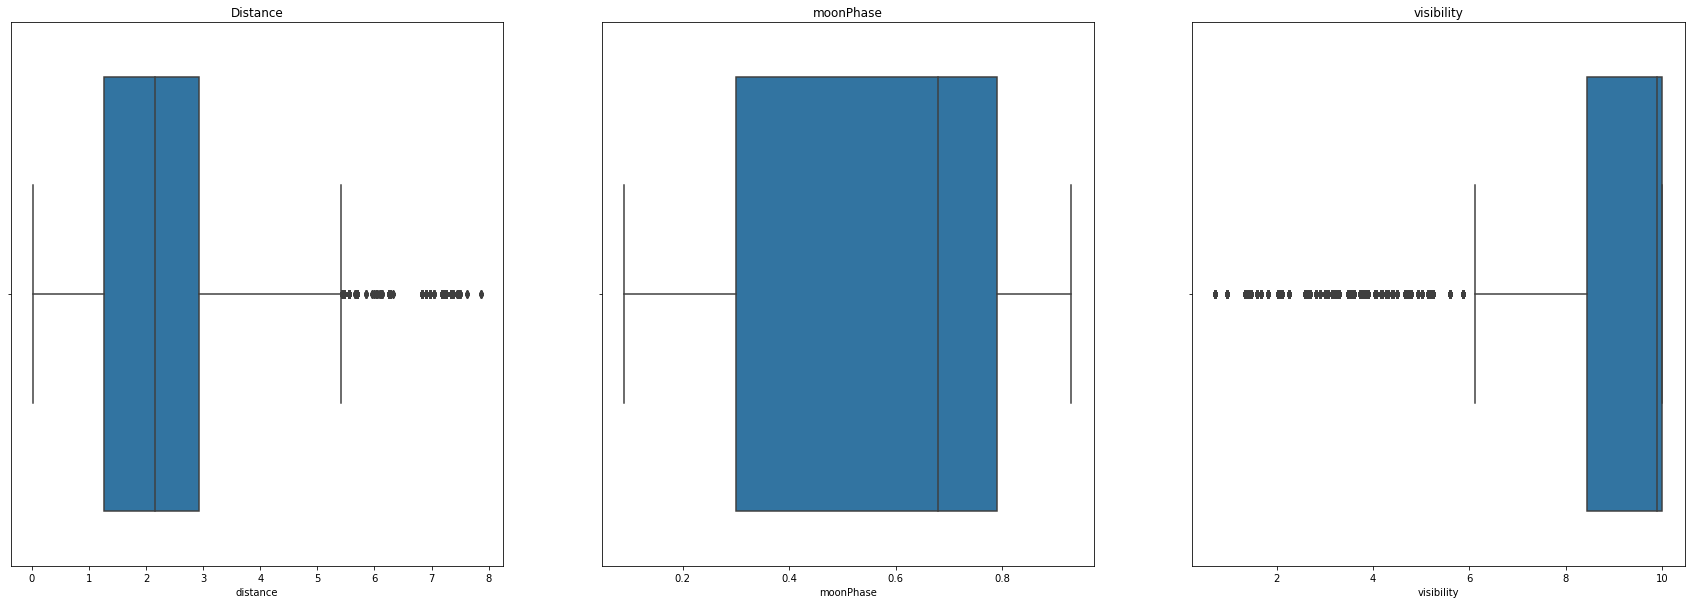

In [22]:
fig = plt.figure(figsize=(30,10))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(X_train['distance'])
plt.title('Distance')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.boxplot(X_train['moonPhase'])
plt.title('moonPhase')

fig.add_subplot(row, col, 3)
# plt.subplot(1,2,1)
sns.boxplot(X_train['visibility'])
plt.title('visibility')

Boxplot untuk melihat data outlier dari ketiga kolom pada X_train

In [23]:
print('y_train skewness =\n',X_train.skew())
print('X_test skewness =\n',X_test.skew())


y_train skewness =
 distance            0.835450
surge_multiplier    8.320933
moonPhase          -0.377988
visibility         -1.506823
dtype: float64
X_test skewness =
 distance            0.830023
surge_multiplier    8.318141
moonPhase          -0.385877
visibility         -1.508107
dtype: float64


C:\Users\DELL\AppData\Local\Temp/ipykernel_17900/2016329852.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('y_train skewness =\n',X_train.skew())
C:\Users\DELL\AppData\Local\Temp/ipykernel_17900/2016329852.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('X_test skewness =\n',X_test.skew())


dari nilai skew diatas bisa dilihat untuk visibility dan distance sedikit skewed

In [24]:
print(X_train['distance'].quantile([0.25, 0.5, 0.75]))
print(X_train['moonPhase'].quantile([0.25, 0.5, 0.75]))
print(X_train['visibility'].quantile([0.25, 0.5, 0.75]))


0.25    1.27
0.50    2.16
0.75    2.93
Name: distance, dtype: float64
0.25    0.30
0.50    0.68
0.75    0.79
Name: moonPhase, dtype: float64
0.25    8.432
0.50    9.880
0.75    9.996
Name: visibility, dtype: float64


Perhitungan q1 q2 q3 untuk masing-masing kolom

In [25]:
q1distance = 1.27
q3distance = 2.93
q1moon     = 0.30
q3moon     = 0.79
q1visi     = 8.432
q3visi     = 9.996
iqrdist = q3distance-q1distance
iqrmoon = q3moon - q1moon
iqrvisi = q3visi - q1visi
minimumdistance = q1distance - (1.5*iqrdist)
maximumdistance = q3distance + (1.5*iqrdist)
minimummoon = q1moon - (1.5*iqrmoon)
maximummoon = q3moon + (1.5*iqrmoon)
minimumvisi = q1visi - (1.5*iqrvisi)
maximumvisi = q3visi + (1.5*iqrvisi)
print("Batas Minimum Outlier X_train Distance =", minimumdistance)
print("Batas Maximum Outlier X_train Distance =", maximumdistance)
print("Batas Minimum Outlier X_train moonPhase =", minimummoon)
print("Batas Maximum Outlier X_train moonPhase =", maximummoon)
print("Batas Minimum Outlier X_train Visibility =", minimumvisi)
print("Batas Maximum Outlier X_train Visibility =", maximumvisi)

Batas Minimum Outlier X_train Distance = -1.2200000000000002
Batas Maximum Outlier X_train Distance = 5.42
Batas Minimum Outlier X_train moonPhase = -0.4350000000000001
Batas Maximum Outlier X_train moonPhase = 1.5250000000000001
Batas Minimum Outlier X_train Visibility = 6.086
Batas Maximum Outlier X_train Visibility = 12.342


In [26]:
# winsorizing

X_train.loc[X_train['distance']>=maximumdistance, 'distance'] = maximumdistance
X_train.loc[X_train['distance']<=minimumdistance, 'distance'] = minimumdistance

X_train.loc[X_train['moonPhase']>=maximummoon, 'moonPhase'] = maximummoon
X_train.loc[X_train['moonPhase']<=minimummoon, 'moonPhase'] = minimummoon

X_train.loc[X_train['visibility']>=maximumvisi, 'visibility'] = maximumvisi
X_train.loc[X_train['visibility']<=minimumvisi, 'visibility'] = minimumvisi


Menggunakan winsorizer untuk handling outliers. Nilai-nilai outliers diubah menjadi nilai maximum dan minimun dari masing2 kolom. Pemilihan metode ini salah satunya untuk mempertahankan shape dari X_train untuk pemodelan selanjutnya.

In [27]:
np.where(X_train['distance']>maximumdistance)


(array([], dtype=int64),)

Salah satu tes untuk melihat tidak ada nilai outlier

In [28]:
X_train.describe()

,distance,surge_multiplier,moonPhase,visibility
count,554448.000000,554448.000000,554448.000000,554448.000000
mean,2.180327,1.013884,0.578884,8.986243
std,1.105750,0.091717,0.244705,1.557318
min,0.020000,1.000000,0.090000,6.086000
25%,1.270000,1.000000,0.300000,8.432000
50%,2.160000,1.000000,0.680000,9.880000
75%,2.930000,1.000000,0.790000,9.996000
max,5.420000,3.000000,0.930000,10.000000


dari describe diatas terlihat nilai min max dari masing-masing kolom sudah berubah yang berarti outliers sudah dikendalikan.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'visibility')

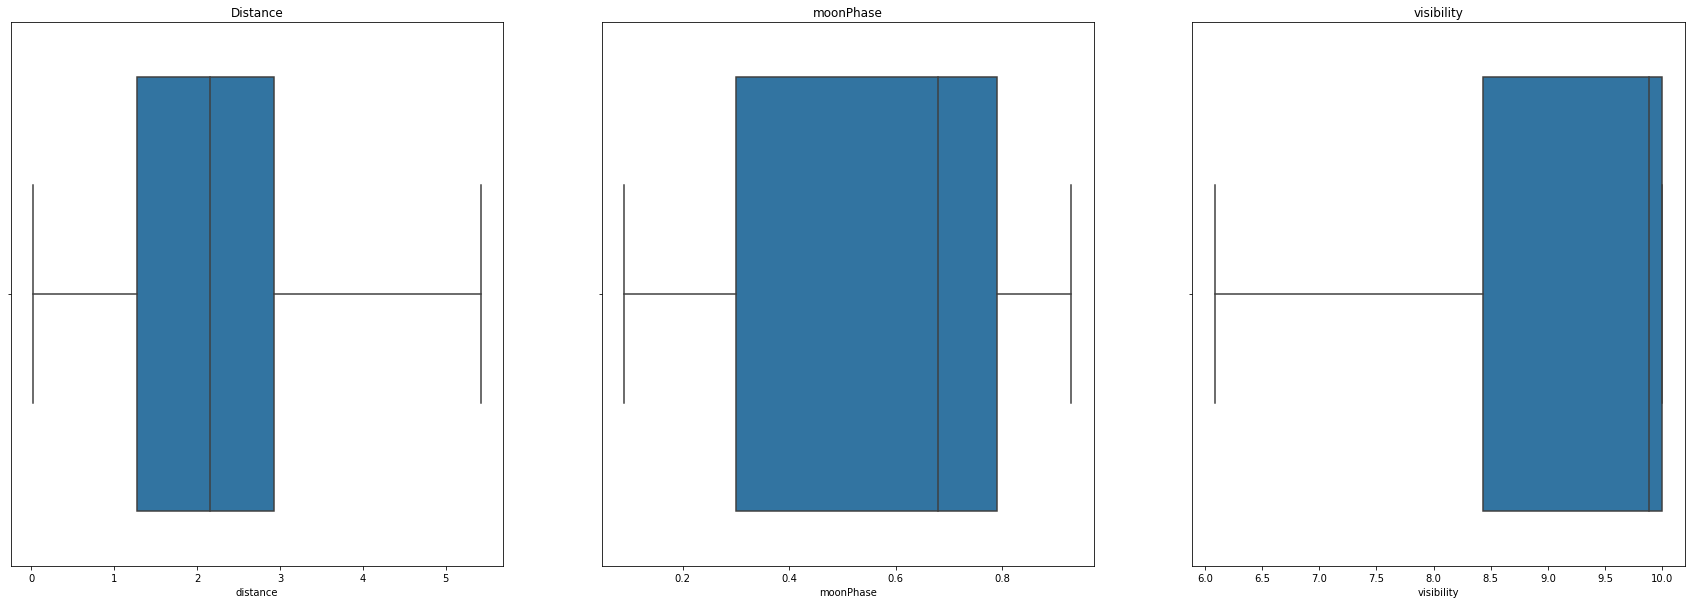

In [29]:
fig = plt.figure(figsize=(30,10))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(X_train['distance'])
plt.title('Distance')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.boxplot(X_train['moonPhase'])
plt.title('moonPhase')

fig.add_subplot(row, col, 3)
# plt.subplot(1,2,1)
sns.boxplot(X_train['visibility'])
plt.title('visibility')

Dari boxplot diatas dapat dibuktikan data X_train sudah tidak ada outliers.

In [30]:
y_test.quantile([0.25, 0.5, 0.75])

0.25     9.0
0.50    13.5
0.75    22.5
Name: price, dtype: float64

Perhitungan q1 q2 q3 dari y_test

In [31]:
q1 = 9.0
q3 = 22.5
iqr = q3-q1
minimum = q1 - (1.5*iqr)
maximum = q3 + (1.5*iqr)
print("Batas Minimum Outlier y_test =", minimum)
print("Batas Maximum Outlier y_test =", maximum)

Batas Minimum Outlier y_test = -11.25
Batas Maximum Outlier y_test = 42.75


Nilai batas minimum dan maximum dari y_test

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'y_test')

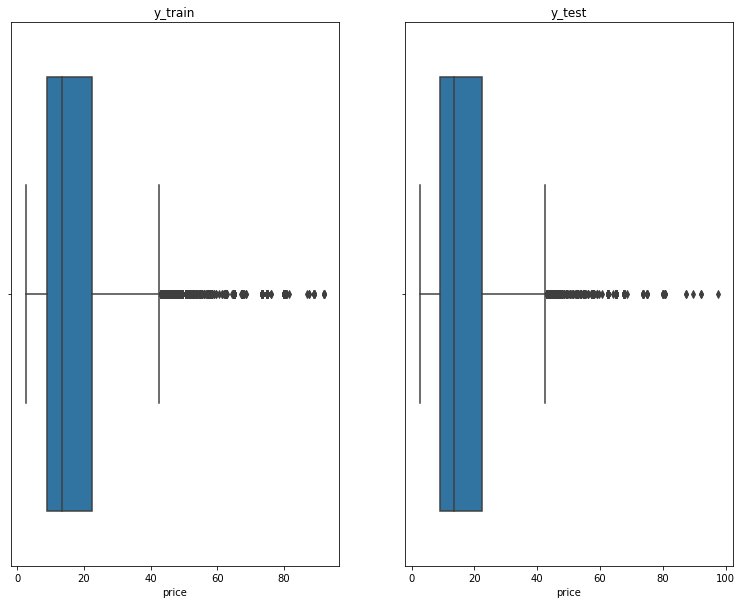

In [32]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 3

fig.add_subplot(row, col, 1)
sns.boxplot(y_train)
plt.title('y_train')

fig.add_subplot(row, col, 2)
sns.boxplot(y_test)
plt.title('y_test')

Text(0.5, 1.0, 'y_test')

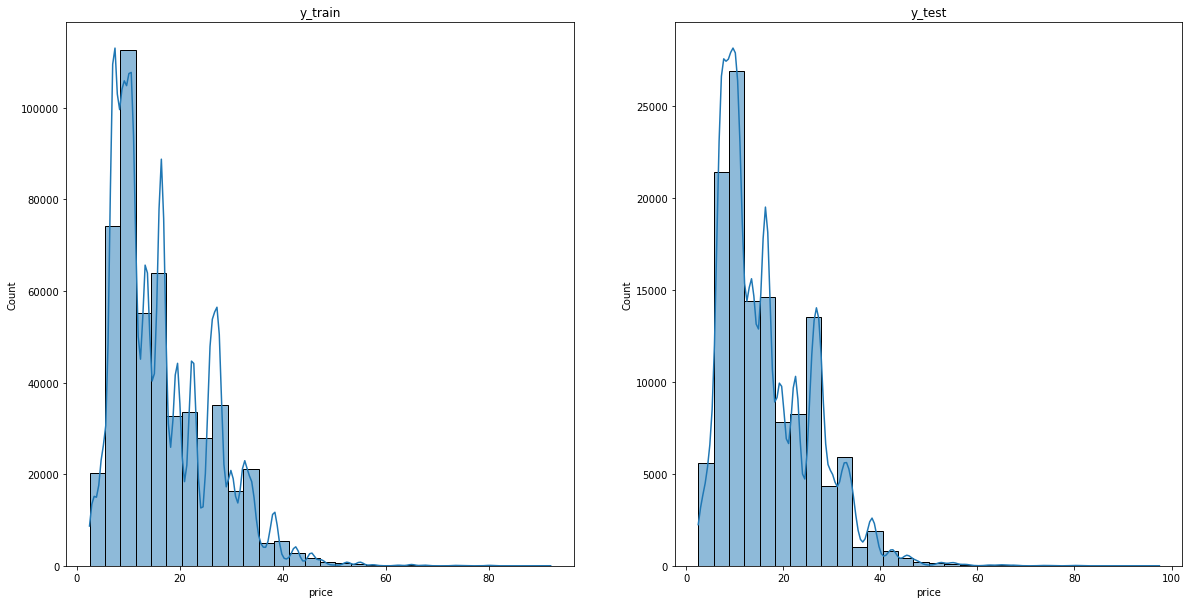

In [33]:
fig = plt.figure(figsize=(20,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
# plt.subplot(1,2,1)
sns.histplot(y_train, bins=30, kde=True)
plt.title('y_train')

fig.add_subplot(row, col, 2)
# plt.subplot(1,2,1)
sns.histplot(y_test, bins=30, kde=True)
plt.title('y_test')

Sebaran data dari y_train dan y_test terlihat sedikit right skewed

In [34]:
print('y_train skewness =',y_train.skew())
print('y_test skewness =',y_test.skew())


y_train skewness = 1.044419101982077
y_test skewness = 1.0509984282230054


dari nilai skewness diatas yang > 0 maka benar right skewed

In [35]:
y_train.quantile([0.25, 0.5, 0.75])

0.25     9.0
0.50    13.5
0.75    22.5
Name: price, dtype: float64

Perhitungan q1 q2 q3 dari y_train

In [36]:
q1 = 9.0
q3 = 22.5
iqr = q3-q1
minimum = q1 - (1.5*iqr)
maximum = q3 + (1.5*iqr)
print("Batas Minimum Outlier y_train =", minimum)
print("Batas Maximum Outlier y_train =", maximum)

Batas Minimum Outlier y_train = -11.25
Batas Maximum Outlier y_train = 42.75


Nilai batas minimum dan maximum dari y_train. NIlai dari minimum dan maximum y_train dan y_test sama maka variabel yang akan digunakan sama

In [37]:
#Winsorizer
y_train.loc[y_train>=maximum] = maximum
y_train.loc[y_train<=minimum] = minimum
y_test.loc[y_test>=maximum] = maximum
y_test.loc[y_test<=minimum] = minimum

Menggunakan winsorizer untuk handling outliers. Nilai-nilai outliers diubah menjadi nilai maximum dan minimun dari masing2 kolom. Pemilihan metode ini salah satunya untuk mempertahankan shape dari X_train untuk pemodelan selanjutnya.

In [38]:
print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (554448, 6)
X_test Size  = (138613, 6)
y_train Size = (554448,)
y_test Size  = (138613,)


Shape dari Train-Test set masih sama setelah Handling Outliers

---

## Handling Missing Value

In [39]:
X_train.isnull().sum()

distance            0
surge_multiplier    0
moonPhase           0
visibility          0
name                0
cab_type            0
dtype: int64

Tidak ada nilai null pada X_train

In [40]:
y_train.isnull().sum()

44188

Terdapat 44188 nilai null pada y_train

In [41]:
X_test.isnull().sum()

distance            0
surge_multiplier    0
moonPhase           0
visibility          0
name                0
cab_type            0
dtype: int64

Tidak ada nilai null pada X_test

In [42]:
y_test.isnull().sum()

10906

Terdapat 10906 nilai null pada y_test

Handling missing value ini akan menggunakan metode Missing Completely at Random (MCAR), y_train dan y_test tidak terdistribusi normal(right skewed) maka akan menggunakan nilai median untuk mengisi nilai null.

In [43]:
print('y_train median :', y_train.median())
print('y_train mean   :', y_train.mean())

print('y_test median :', y_train.median())
print('y_test mean   :', y_train.mean())

y_train median : 13.5
y_train mean   : 16.47166072198487
y_test median : 13.5
y_test mean   : 16.47166072198487


Perhitungan nilai mean dan median pada y_train dan y_test

In [44]:
y_train = y_train.fillna(y_train.median())
y_test  = y_test.fillna(y_test.median())

mengisi nilai null pada y_train dan y_test

In [45]:
print('y_train NaN =',y_train.isnull().sum())
print('y_test NaN  =',y_test.isnull().sum())

y_train NaN = 0
y_test NaN  = 0


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554448 entries, 665873 to 252036
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554448 non-null  float64
 1   surge_multiplier  554448 non-null  float64
 2   moonPhase         554448 non-null  float64
 3   visibility        554448 non-null  float64
 4   name              554448 non-null  object 
 5   cab_type          554448 non-null  object 
dtypes: float64(4), object(2)
memory usage: 29.6+ MB


Semua isi kolom data sudah tidak ada nilai Null

---

## Feature Selection

In [47]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['distance', 'surge_multiplier', 'moonPhase', 'visibility']
Categorical Columns :  ['name', 'cab_type']


Memisahkan antara data numerik dan data kategorikal

In [48]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X train test data dipisahkan lagi sesuai data numerik dan kategorik

In [49]:
X_test_cat

,name,cab_type
30020,Lux Black,Lyft
387059,Black,Uber
376852,Black,Uber
54217,Lyft,Lyft
82411,UberPool,Uber
...,...,...
372364,Shared,Lyft
60662,Lux Black XL,Lyft
113851,UberXL,Uber
288097,Black SUV,Uber


----

## Feature Scaling

In [50]:
X_train_num

,distance,surge_multiplier,moonPhase,visibility
665873,1.36,1.0,0.64,8.286
585100,1.36,1.0,0.27,9.501
661622,1.01,1.0,0.37,9.375
613516,0.80,1.0,0.24,9.892
216028,1.41,1.0,0.86,6.105
...,...,...,...,...
219638,1.17,1.0,0.79,9.888
120166,3.01,1.0,0.72,10.000
549220,1.22,1.0,0.72,9.981
162752,1.22,1.0,0.75,9.972


In [51]:
X_train_num.skew()

distance            0.591246
surge_multiplier    8.320933
moonPhase          -0.377988
visibility         -1.207745
dtype: float64

Pemeriksaan skewness data X_train_num. dari hasil diatas data tergolong skewed walaupun tidak terlalu besar nilainya.

In [52]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.24814815, 0.        , 0.6547619 , 0.56208482],
       [0.24814815, 0.        , 0.21428571, 0.87250894],
       [0.18333333, 0.        , 0.33333333, 0.84031681],
       ...,
       [0.22222222, 0.        , 0.75      , 0.99514563],
       [0.22222222, 0.        , 0.78571429, 0.99284619],
       [0.62777778, 0.        , 0.78571429, 0.98978028]])

Scaling data menggunakan minmaxscaler karena data skewed atau tidak terdistribusi normal

---

## Feature Encoding

In [53]:
# Display X_train_cat

X_train_cat

,name,cab_type
665873,Taxi,Uber
585100,Black SUV,Uber
661622,Lux Black XL,Lyft
613516,Taxi,Uber
216028,Black,Uber
...,...,...
219638,Lux Black,Lyft
120166,Lyft,Lyft
549220,Lyft,Lyft
162752,UberPool,Uber


In [54]:
# Feature Encoding using OrdinalEcoder
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

OrdinalEncoder()

Menggunakan Ordinalencoder karena data kategorik bersifat ordinal

In [55]:
X_train_cat_encoded = encoder.transform(X_train_cat)
X_train_cat_encoded

array([[8., 1.],
       [1., 1.],
       [4., 0.],
       ...,
       [5., 0.],
       [9., 1.],
       [1., 1.]])

Encoding data X_train_set menjadi matriks

In [56]:
X_test_cat_encoded = encoder.transform(X_test_cat)
X_test_cat_encoded

array([[ 3.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ...,
       [11.,  1.],
       [ 1.,  1.],
       [10.,  1.]])

Encoding data X_test_set menjadi matriks

In [57]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.24814815, 0.        , 0.6547619 , 0.56208482, 8.        ,
        1.        ],
       [0.24814815, 0.        , 0.21428571, 0.87250894, 1.        ,
        1.        ],
       [0.18333333, 0.        , 0.33333333, 0.84031681, 4.        ,
        0.        ],
       ...,
       [0.22222222, 0.        , 0.75      , 0.99514563, 5.        ,
        0.        ],
       [0.22222222, 0.        , 0.78571429, 0.99284619, 9.        ,
        1.        ],
       [0.62777778, 0.        , 0.78571429, 0.98978028, 1.        ,
        1.        ]])

Data numerik dan kategorik yang telah diencode digabungkan lagi matriksnya.

In [58]:
# Display as DataFrame
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_train_final_df

,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,0.248148,0.0,0.654762,0.562085,8.0,1.0
1,0.248148,0.0,0.214286,0.872509,1.0,1.0
2,0.183333,0.0,0.333333,0.840317,4.0,0.0
3,0.144444,0.0,0.178571,0.972407,8.0,1.0
4,0.257407,0.0,0.916667,0.004854,0.0,1.0
...,...,...,...,...,...,...
554443,0.212963,0.0,0.833333,0.971385,3.0,0.0
554444,0.553704,0.0,0.750000,1.000000,5.0,0.0
554445,0.222222,0.0,0.750000,0.995146,5.0,0.0
554446,0.222222,0.0,0.785714,0.992846,9.0,1.0


Matriks yang sudah digabung diubah menjadi dataframe lagi.

---

## Model Definition

In [59]:
# Training using LinearRegression

from sklearn.linear_model import LinearRegression 

model_lin_reg = LinearRegression()

Pembuatan model liniar regression menggunakan hyperparameter default dari modul tersebut

---

## Model Training

In [60]:
X_train_final.shape

(554448, 6)

In [61]:
y_train.shape

(554448,)

In [62]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan

---

## Model Evaluation

In [63]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([12.29809993, 22.67643295, 14.44086169, ..., 13.48136793,
       10.45085585, 27.91240519])

In [64]:
y_pred_train.shape

(554448,)

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [65]:
# Evaluate Model using MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE Train-Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE Train-Set : ', mean_squared_error(y_train, y_pred_train))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE Train-Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('')
print('r2score Train-Set : ', r2_score(y_train, y_pred_train))
print('r2score Test-Set  : ', r2_score(y_test, y_pred_test))

print('\nAverage Price :',df['price'].mean())

MAE Train-Set :  4.854099490382175
MAE Test-Set  :  4.855029833447239

MSE Train-Set :  37.64586355419212
MSE Test-Set  :  37.66919005510647

RMSE Train-Set :  6.135622507471603
RMSE Test-Set  :  6.1375231205353895

r2score Train-Set :  0.5071913253638484
r2score Test-Set  :  0.508324343072222

Average Price : 16.545125490614065


In [66]:
4.854099490382175/16.545125490614065*100

29.338547435834627

Berdasarkan MAE

Error yang dihasilkan terhadap prediksi sebesar 4.85(dollar), error tersebut diasumsikan cukup besar karena hampir mencapai 30% error.

Berdasarkan skor r2 nilai cenderung sama maka diasumsikan model yang telah dibuat merupakan best fit.

---

## Model Saving

In [67]:
# Model Saving

import pickle

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)

with open('list_num_columns.txt', 'w') as file_4:
  file_4.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_5:
  file_5.write(str(cat_columns))

Menyimpan model yang telah dibuat

---

## Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Load Model

In [68]:
# Load All Files

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = pickle.load(file_2)

with open('model_lin_reg.pkl', 'rb') as file_3:
  model_lin_reg = pickle.load(file_3)

with open('list_num_columns.txt', 'r') as file_4:
  list_num_columns = file_4.read()

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_columns = file_5.read()

Load model yang sudah dibuat.

In [69]:
# Convert `num_columns` and `cat_columns` into List

import ast

list_num_columns = ast.literal_eval(list_num_columns)
list_cat_columns = ast.literal_eval(list_cat_columns)
list_num_columns

['distance', 'surge_multiplier', 'moonPhase', 'visibility']

### Inferencing

In [70]:
# Split between Numerical Columns and Categorical Columns

df_inf_num = df_inf[list_num_columns]
df_inf_cat = df_inf[list_cat_columns]

df_inf_num

,distance,surge_multiplier,moonPhase,visibility
0,1.47,1.00,0.68,2.642
1,1.08,1.25,0.68,9.961
2,0.53,1.00,0.93,9.878
3,1.41,1.00,0.21,9.725
4,1.53,1.00,0.24,9.608
5,2.72,1.00,0.24,7.769
6,1.25,1.25,0.64,3.058
7,2.93,1.00,0.21,10.000
8,1.08,1.00,0.68,10.000
9,1.35,1.00,0.72,10.000


Split data numerik dan kategorik pada data yang akan diprediksi

In [71]:
# Feature Scaling and Feature Encoding

df_inf_num_scaled = model_scaler.transform(df_inf_num)
df_inf_cat_encoded = model_encoder.transform(df_inf_cat)
df_inf_num_scaled

array([[ 0.26851852,  0.        ,  0.70238095, -0.87991824],
       [ 0.1962963 ,  0.125     ,  0.70238095,  0.99003577],
       [ 0.09444444,  0.        ,  1.        ,  0.96882984],
       [ 0.25740741,  0.        ,  0.14285714,  0.9297394 ],
       [ 0.27962963,  0.        ,  0.17857143,  0.8998467 ],
       [ 0.5       ,  0.        ,  0.17857143,  0.42999489],
       [ 0.22777778,  0.125     ,  0.6547619 , -0.77363311],
       [ 0.53888889,  0.        ,  0.14285714,  1.        ],
       [ 0.1962963 ,  0.        ,  0.70238095,  1.        ],
       [ 0.2462963 ,  0.        ,  0.75      ,  1.        ]])

Dilakukan scaling pada data numerik dan encoding untuk data kategorik.

In [72]:
# Concate Numerical Columns and Categorical Columns

df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)
df_inf_final

array([[ 0.26851852,  0.        ,  0.70238095, -0.87991824,  8.        ,
         1.        ],
       [ 0.1962963 ,  0.125     ,  0.70238095,  0.99003577,  2.        ,
         0.        ],
       [ 0.09444444,  0.        ,  1.        ,  0.96882984,  6.        ,
         0.        ],
       [ 0.25740741,  0.        ,  0.14285714,  0.9297394 ,  1.        ,
         1.        ],
       [ 0.27962963,  0.        ,  0.17857143,  0.8998467 ,  5.        ,
         0.        ],
       [ 0.5       ,  0.        ,  0.17857143,  0.42999489, 10.        ,
         1.        ],
       [ 0.22777778,  0.125     ,  0.6547619 , -0.77363311,  4.        ,
         0.        ],
       [ 0.53888889,  0.        ,  0.14285714,  1.        ,  7.        ,
         0.        ],
       [ 0.1962963 ,  0.        ,  0.70238095,  1.        ,  0.        ,
         1.        ],
       [ 0.2462963 ,  0.        ,  0.75      ,  1.        , 11.        ,
         1.        ]])

Digabungkan kembali menjadi 1 matriks.

In [73]:
# Predict Inference-Set

y_pred_inf = model_lin_reg.predict(df_inf_final)
y_pred_inf

array([12.58617947, 21.72821754, 10.22036661, 22.80738266, 14.301016  ,
       12.84778852, 19.21543793, 14.93383897, 23.41729487,  7.82537272])

Menggunakan model linear regression, dilakukan price prediction dari df_inf tadi.

In [74]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,12.586179
1,21.728218
2,10.220367
3,22.807383
4,14.301016
5,12.847789
6,19.215438
7,14.933839
8,23.417295
9,7.825373


Berikut hasil prediksi berdasarkan model yang telah dibuat.

In [75]:
# Merge Inference-Set and Prediction

pd.concat([df_inf, y_pred_inf_df], axis=1)

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type,Price - Prediction
0,NaN,1.47,1.00,0.68,2.642,Taxi,Uber,12.586179
1,16.5,1.08,1.25,0.68,9.961,Lux,Lyft,21.728218
2,9.0,0.53,1.00,0.93,9.878,Lyft XL,Lyft,10.220367
3,27.0,1.41,1.00,0.21,9.725,Black SUV,Uber,22.807383
4,7.0,1.53,1.00,0.24,9.608,Lyft,Lyft,14.301016
5,9.5,2.72,1.00,0.24,7.769,UberX,Uber,12.847789
6,34.0,1.25,1.25,0.64,3.058,Lux Black XL,Lyft,19.215438
7,9.0,2.93,1.00,0.21,10.000,Shared,Lyft,14.933839
8,16.0,1.08,1.00,0.68,10.000,Black,Uber,23.417295
9,13.0,1.35,1.00,0.72,10.000,UberXL,Uber,7.825373


Data hasil prediksi digabungkan dengan df_inf awal dengan penambahan kolom Price - Prediction

---

## Pengambilan Kesimpulan

In [76]:
# Get Intercept and Slope

intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

slope.round()

Intercept :  17.839889028502466
Slope :  [ 1.38563521e+01  3.33066656e+01 -4.14325822e-02 -5.40462879e-03
 -1.48025152e+00  2.89196133e+00]


array([14., 33., -0., -0., -1.,  3.])

Persamaan linier hasil pemodelan Price Prediction adalah

price(y) = 17.84 + 14distance + 33surge_multiplier -0.04moonPhase - 0.005visibility - 1name + 2.89cab_type

In [77]:
df_inf.head()

,price,distance,surge_multiplier,moonPhase,visibility,name,cab_type
0,NaN,1.47,1.00,0.68,2.642,Taxi,Uber
1,16.5,1.08,1.25,0.68,9.961,Lux,Lyft
2,9.0,0.53,1.00,0.93,9.878,Lyft XL,Lyft
3,27.0,1.41,1.00,0.21,9.725,Black SUV,Uber
4,7.0,1.53,1.00,0.24,9.608,Lyft,Lyft


Berdasarkan MAE

Error yang dihasilkan terhadap prediksi sebesar 4.85(dollar), error tersebut diasumsikan cukup besar karena hampir mencapai 30% error.

Berdasarkan skor r2 nilai cenderung sama maka diasumsikan model yang telah dibuat merupakan best fit.

------